In [1]:
import numpy as np
import matplotlib.pyplot as plt 

from dense_image_aligment import show_data, image_aligment_method, read_as_grayscale
from dense_image_aligment import save_aligment_progress, read_as_colored, show_data
from dense_image_aligment.transformations import AffineTransformation

import cv2

from pathlib import Path 
from glob import glob 

In [2]:
root_images = Path('../datasets/chess/seq-01/')

seq_images_names = glob(str(root_images / '*.color.png'))
seq_images_names.sort(key=lambda x: int(x.split('.color.png')[0].split('-')[-1]))

seq_images_names[:5]

['../datasets/chess/seq-01/frame-000000.color.png',
 '../datasets/chess/seq-01/frame-000001.color.png',
 '../datasets/chess/seq-01/frame-000002.color.png',
 '../datasets/chess/seq-01/frame-000003.color.png',
 '../datasets/chess/seq-01/frame-000004.color.png']

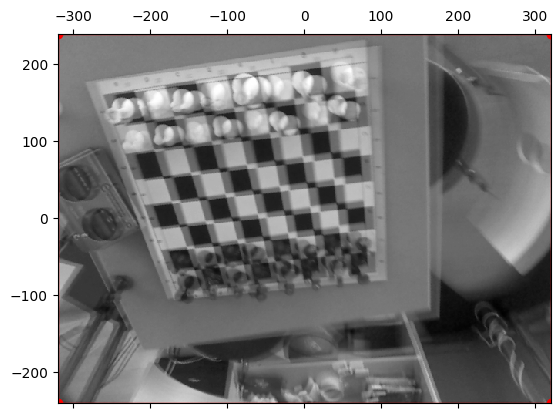

In [3]:
index_image = 200
index_template = 202

image = read_as_grayscale(seq_images_names[index_image])#[100:500, 100:500]
template = read_as_grayscale(seq_images_names[index_template])#[100:500, 100:500]

# image = cv2.resize(image, [s // 4 for s in image.shape[::-1]])
# template = cv2.resize(template, [s // 4 for s in template.shape[::-1]])


method, params = image_aligment_method(key='forward_additive')
params['alpha'] = 1.
params['max_iterations'] = 50
params['convergence_threshold'] = 1e-8
params['p_init'] = np.array(
    [
        [1, 0., 0.], 
        [0., 1., 0.],
    ]
).reshape(-1)

affine_transform = AffineTransformation(params['p_init'].reshape(-1))

show_data(
    image=image, 
    template=template, 
    coords_transform=affine_transform
)

In [4]:
ps = method(
    image=image,
    template=template,
    coord_transform=affine_transform,
    **params
)

iteration: 49, |∇p|=0.00027: 100%|██████████| 50/50 [02:45<00:00,  3.31s/it]


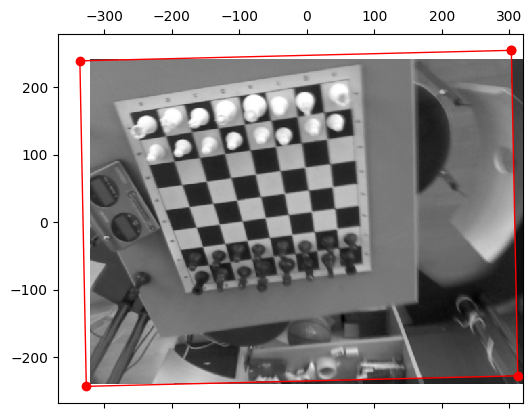

In [5]:
affine_transform.p = ps[-1]

show_data(
    image=image, 
    template=template, 
    coords_transform=affine_transform
)

100%|██████████| 51/51 [05:34<00:00,  6.56s/it]


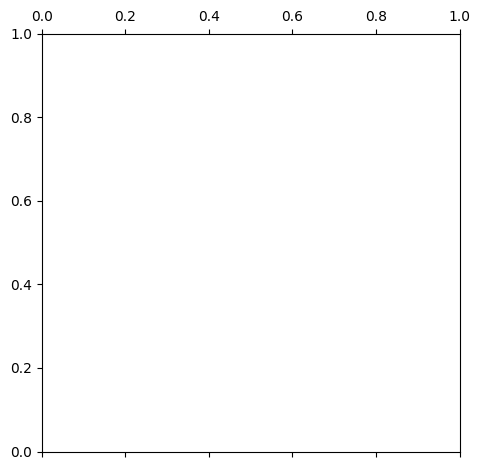

In [6]:
ps_ = [cv2.invertAffineTransform(p.reshape(2, 3)).reshape(-1) for p in ps]

save_aligment_progress(
    f'../docs/images/affine_alignment_example.gif',
    image=image,
    template=template,
    coords_transform=affine_transform,
    ps=ps_,
    duration=300,
)